#Netflix Data Visualization

## Tasks

*   Understanding the Dataset, types and missing values
*   Clean the dataset and handle the missing values
*   Perform Data Visualization
*   Create Final Summary report.





In [ ]:
#import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#reading our dataset
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#Understanding the Dataset, types and missing values


*   show_id     : Unique ID for every Movie / Tv Show
*   type        : Identifier - A Movie or TV Show
*   title       : Title of the Movie / Tv Show
*   director    : Director of the Movie
*   cast        : Actors involved in the movie / show
*   country     : Country where the movie / show was produced
*   date_added  : Date it was added on Netflix
*   release_year: Actual Release year of the move / show
*   rating       : TV Rating of the movie / show
*   duration    :Total Duration - in minutes or number of seasons







In [ ]:
df.shape # In dataset there is 8807 rows and 12 colums

(8807, 12)

In [ ]:
df.describe() # show statistical summary about columns (find integer and flote columns)

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info() # shows the count and datatypes of our columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# missing values
df.isna().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


## Clean the dataset and handle the missing values

The following columns do not need to fill:

*   type
*   title
*   release_year
*   listed_in
*   description

The following are missing data:

*   duration
*   rating
*   date_added
*   cast
*   country
*   director

we need to update the data types of the **data_added** to datetime. "Unavailable" will be substiturted in for nulls of fields with objective data types. This is applied to everythings excepts for release_year.










In [ ]:
# convert the data type for object to datatime64
df['date_added'] = pd.to_datetime(df['date_added'],  format='%B %d, %Y', errors='coerce')
df.head()  #The errors='coerce' argument handles invalid dates by setting them to NaT (Not a Time).

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.fillna({'rating': 'Unavailable', 'cast':'Unavailable','country':'Unavailable','director':'Unavailable'},inplace=True)
#df.isna().sum()

missing data_added is to be substituted in with the most recent date from date_added this is because netflix has the tendency to add more content over time

In [ ]:
df[df.date_added.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6079,s6080,TV Show,Abnormal Summit,"Jung-ah Im, Seung-uk Jo","Hyun-moo Jun, Si-kyung Sung, Se-yoon Yoo",South Korea,NaT,2017,TV-PG,2 Seasons,"International TV Shows, Korean TV Shows, Stand...","Led by a trio of Korean celebs, a multinationa..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6177,s6178,TV Show,忍者ハットリくん,Unavailable,Unavailable,Japan,NaT,2012,TV-Y7,2 Seasons,"Anime Series, Kids' TV","Hailing from the mountains of Iga, Kanzo Hatto..."
6213,s6214,TV Show,Bad Education,Unavailable,"Jack Whitehall, Mathew Horne, Sarah Solemani, ...",United Kingdom,NaT,2014,TV-MA,3 Seasons,"British TV Shows, TV Comedies","A history teacher at the posh Abbey Grove, Alf..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8539,s8540,TV Show,The Tudors,Unavailable,"Jonathan Rhys Meyers, Henry Cavill, James Frai...","Ireland, Canada, United States, United Kingdom",NaT,2010,TV-MA,4 Seasons,TV Dramas,All the splendor and scandal of England's 16th...
8557,s8558,TV Show,The West Wing,Unavailable,"Martin Sheen, Rob Lowe, Allison Janney, John S...",United States,NaT,2005,TV-14,7 Seasons,TV Dramas,This powerful political epic chronicles the tr...
8684,s8685,TV Show,Vroomiz,Unavailable,"Joon-seok Song, Jeong-hwa Yang, Sang-hyun Um, ...",South Korea,NaT,2016,TV-Y,3 Seasons,"Kids' TV, Korean TV Shows","For these half-car, half-animal friends, each ..."
8712,s8713,TV Show,Weird Wonders of the World,Unavailable,Chris Packham,United Kingdom,NaT,2016,TV-PG,2 Seasons,"British TV Shows, Docuseries, Science & Nature TV",From animal oddities and bizarre science to me...


In [ ]:
most_recent_date = df['date_added'].max()
df.fillna({'date_added': most_recent_date}, inplace=True)


In [ ]:
df[df.show_id=='s6067']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,2021-09-25,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


**duration data input error**
missing duration are all movies by Louis C.K

In [ ]:
df[df.duration.isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


check no other content with same director to avoid accidental overwriting

In [ ]:
df[df.director == 'Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


**overwrite and check**.
add rating value to the  duration and make rating as "Unavailabel"

In [ ]:
# loc helps easily accessing the columns by names
df.loc[df['director']=='Louis C.K.', 'duration']= df['rating']
df.loc[df['director']=='Louis C.K.', 'rating']= 'Unavailable'
df[df.director=='Louis C.K.'].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


#Visualization

In [ ]:
# distribution of content types
fig = px.histogram(df, x='type', color='type', title='Distribution of Content')
fig.show()

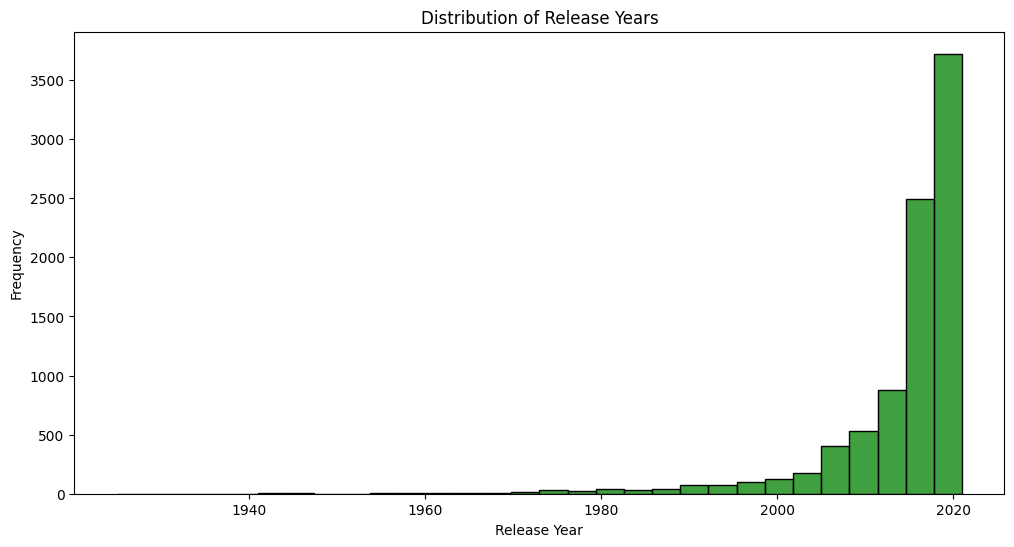

In [ ]:
# Distribution of release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, color='green')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

<ipython-input-66-58c4be345978>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




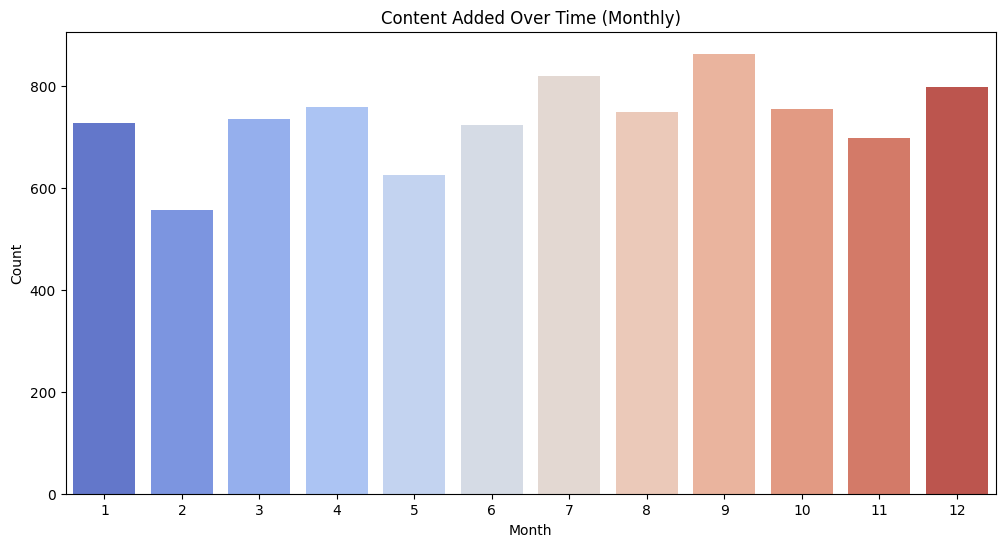

In [ ]:
# Content added over time
df['date_added_month'] = df['date_added'].dt.month
plt.figure(figsize=(12, 6))
sns.countplot(x='date_added_month', data=df, palette='coolwarm')
plt.title('Content Added Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [ ]:
#Tread of Content Produced on Netfilx Every Year
df1 = df[['type','release_year']]
df1['total_count'] = 1
df2 = df1.groupby(['release_year','type']).count().reset_index()

df2 =df2[df2['release_year']>=1990]
graph = px.line(df2, x='release_year', y='total_count', color='type', title = "Tread of Content Produced on Netfilx Every Year")
graph.show()

<ipython-input-89-4fc742030a01>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Top 10 countries with most content
top_countries = df['country'].value_counts().head(10)
print(top_countries)
fig = px.bar(top_countries,
              x=top_countries.values,
              y=top_countries.index,
              color=top_countries.index,
              labels={'x': 'Number of Titles', 'y': 'Country'},
              title='Top 10 Countries with Most Content')
fig.show()

country
United States     2818
India              972
Unavailable        831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


In [ ]:
# Top 10 countries with most content using pie chart
top_countries = df['country'].value_counts().head(10).reset_index()
top_countries.columns = ['country', 'count']
fig = px.pie(top_countries, values='count', names='country',
              title='Top 10 Countries with Most Content',
              hover_data=['count'])
fig.show()

In [ ]:
# Top 10 countries with most content on movies and tv show
#movie_countries = df[df['type'] == 'Movie']['country'].value_counts().head(10)
#tv_show_countries = df[df['type'] == 'TV Show']['country'].value_counts().head(10)
#plt.figure(figsize=(12, 6))
#sns.barplot(x=movie_countries.values, y=movie_countries.index, palette='viridis', label='Movies')
#plt.title('Top 10 Countries with Most Content on Movies and TV Shows')

#plt.figure(figsize=(12, 6))
#sns.barplot(x=tv_show_countries.values, y=tv_show_countries.index, palette='viridis', label='TV Shows')



# Rating distribution
#plt.figure(figsize=(12, 6))
#sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='magma')
#plt.title('Distribution of Ratings')
#plt.xlabel('Rating')
#plt.ylabel('Count')
#plt.xticks(rotation=90)
#plt.show()

In [ ]:
# Rating distribution
fig = px.histogram(df, x="rating", color="type", barmode="group",
                   title="Rating Distribution by Type",
                   labels={"rating": "Rating", "count": "Count"},
                   hover_data=["title"])
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [ ]:
#show release year ,date added and type

fig = px.scatter(df, x='release_year', y='date_added', color='type',
                  hover_name='title',
                  title='Release Year vs. Date Added')
fig.show()


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Text(0, 0.5, 'Genre')

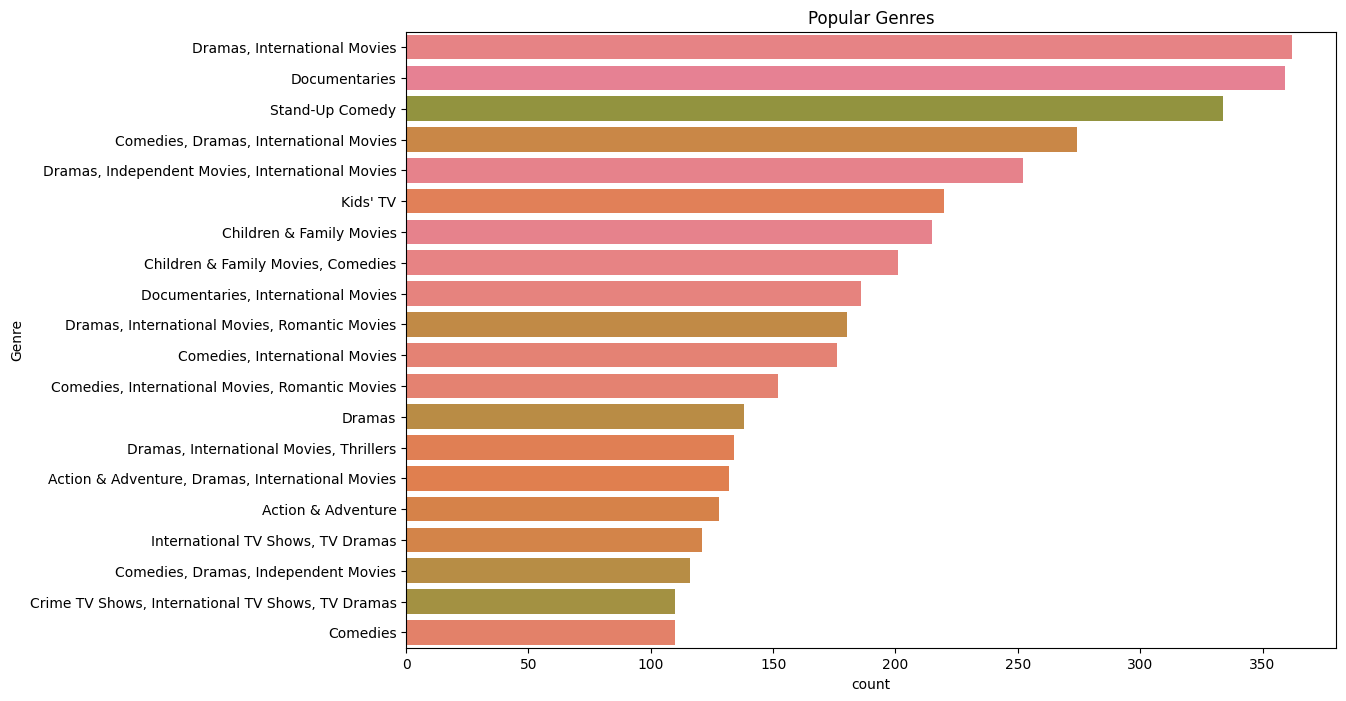

In [ ]:
# popular genres analysis
plt.figure(figsize=(12,8))
sns.countplot(y='listed_in', order = df['listed_in'].value_counts().index[0:20],data=df, hue='listed_in', legend=False)
plt.title('Popular Genres')
plt.xlabel('count')
plt.ylabel('Genre')

In [ ]:
# generate violant plot

import plotly.express as px

fig = px.violin(df, y="release_year", x="type", color="type", box=True, points="all",
                 hover_data=df.columns)
fig.show()

# The violin plot provides a visual representation of the distribution of release years for movies and TV shows.
# It shows the density of release years for each content type, allowing us to understand the overall distribution and any potential differences between movies and TV shows.
# We can see that the distribution of release years for movies is more spread out compared to TV shows, with a higher concentration of movies released in recent years.
# This suggests that Netflix might have a greater focus on adding newer movies compared to TV shows.


In [ ]:
# top 10 actor who play most movies
df_filtered = df[df['cast'] != 'Unavailable']
df_filtered['cast'] = df_filtered['cast'].str.split(', ')

# Explode the 'cast' column to create a new row for each actor
df_exploded = df_filtered.explode('cast')
actor_counts = df_exploded['cast'].value_counts()
top_10_actors = actor_counts.head(10)

fig = px.bar(x=top_10_actors.index, y=top_10_actors.values,
              labels={'x': 'Actor/Actress', 'y': 'Number of Movies/TV Shows'},
              title='Top 10 Actors/Actresses with Most Content')
fig.show()


<ipython-input-84-2abf1efd0ad6>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Sentiment analysis of movie descriptions over time

# Import libraries
import nltk
from textblob import TextBlob
nltk.download('punkt')

# sentiment analysis
df3 = df[['release_year','description']]
df3 = df3.rename(columns = {'release_year':'Year','description':'Description'})
for index, row in df3.iterrows():
    description = row['Description']
    analysis = TextBlob(description)
    sentiment = analysis.sentiment.polarity
    if sentiment > 0:
        sentiment_label = 'Positive'
    elif sentiment < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    df3.loc[index, 'Sentiment'] = sentiment_label
df3 = df3.groupby(['Year', 'Sentiment']).size().reset_index(name='Count')
fig = px.line(df3, x='Year', y='Count', color='Sentiment',
              title='Sentiment Analysis of Movie Descriptions Over Time')
fig.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#Summary

so, far we had perform lots of operatuon over dataset to dig out some very useful information from it. If, we have to conclude the dataset in few line, then we can say that:

*   Netflix has more movies than TV shows
*   Most of the content on netflix is for mature audiences
*   most number of movies and tv shows are produced by United States followed by india
*   After 2018 netflix released alot more content as compared to other years
*   Dramas, international movies and documentaries are the most popular genres on Netflix.







